In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib
import scipy.stats as spst

pd.set_option('display.max_columns',None)

In [48]:
path = '../../git_ignore_file/Dataset'

In [49]:
train = pd.read_csv(f'{path}/dacon_stress_prediction/train.csv')
test = pd.read_csv(f'{path}/dacon_stress_prediction/test.csv')
submission = pd.read_csv(f'{path}/dacon_stress_prediction/sample_submission.csv')

In [50]:
display(train.head())
display(test.head())

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working
0,TEST_0000,F,72,161.95,77.66,312.36,137,112,131.16,0.51,moderate,current-smoker,high blood pressure,heart disease,oversleeping,graduate degree,NaN
1,TEST_0001,F,84,152.35,58.70,269.54,162,95,129.36,0.51,intense,current-smoker,NaN,NaN,normal,graduate degree,NaN
2,TEST_0002,F,45,164.09,76.71,209.08,146,91,169.21,1.13,light,ex-smoker,diabetes,heart disease,sleep difficulty,bachelors degree,6.0
3,TEST_0003,M,58,165.06,76.34,246.52,146,98,133.78,0.52,light,current-smoker,heart disease,heart disease,sleep difficulty,high school diploma,10.0
4,TEST_0004,F,35,158.17,65.60,181.24,142,80,73.93,1.42,moderate,ex-smoker,diabetes,heart disease,oversleeping,NaN,7.0


### Data Info
- ID : 샘플별 고유 ID
- gender : 성별
- age : 연령
- height : 키(cm)
- weight : 몸무게(kg)
- cholesterol : 콜레스테롤 수치
- systolic_blood_pressure : 수축기 혈압
- diastolic_blood_pressure : 이완기 혈압
- glucose : 혈당 수치(mg/dL)
- bone_density : 골밀도(g/cm²)
- activity : 생활시 운동 강도
- smoke_status : 흡연 상태
- medical_history : 만성질환
- family_medical_history : 가족력
- sleep_pattern : 수면패턴
- edu_level : 학력
- mean_working : 1주일당 평균 근로 시간
- stress_score : (TARGET) 스트레스 점수 


### purpose
- Target : stress_score


# Data Check & EDA & Feature engineering

### Data Info
- ID : 샘플별 고유 ID
- gender : 성별
- age : 연령
- height : 키(cm)
- weight : 몸무게(kg)
- cholesterol : 콜레스테롤 수치
- systolic_blood_pressure : 수축기 혈압
- diastolic_blood_pressure : 이완기 혈압
- glucose : 혈당 수치(mg/dL)
- bone_density : 골밀도(g/cm²)
- activity : 생활시 운동 강도
- smoke_status : 흡연 상태
- medical_history : 만성질환
- family_medical_history : 가족력

- sleep_pattern : 수면패턴
- edu_level : 학력
- mean_working : 1주일당 평균 근로 시간
- stress_score : (TARGET) 스트레스 점수 

### feature추가
- is_medical_hisotory : 0 / 1
- pulse_pressure : systolic - diastolic
- pulse_pressure_normal : -1(30미만) / 0 / 1(60초과)
- is_family_history : 0 / 1


In [51]:
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36


In [52]:
display(train.describe())
display(train.info())

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,1968.000000,3000.000000
mean,53.06800,168.585687,72.486680,233.910523,146.144333,95.504000,126.467720,0.933367,8.716972,0.482130
std,20.67207,9.351876,13.167222,24.333434,15.845310,9.895283,18.536844,0.444783,1.628944,0.288252
min,17.00000,141.130000,36.320000,148.810000,97.000000,60.000000,70.050000,-0.220000,4.000000,0.000000
25%,35.00000,161.800000,63.035000,216.927500,135.000000,89.000000,113.912500,0.560000,8.000000,0.230000
50%,53.00000,168.115000,71.240000,234.255000,146.000000,95.000000,126.555000,0.940000,9.000000,0.480000
75%,72.00000,175.352500,81.832500,250.377500,158.000000,102.000000,139.180000,1.300000,10.000000,0.730000
max,89.00000,195.280000,120.880000,313.350000,191.000000,124.000000,185.740000,2.000000,16.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

None

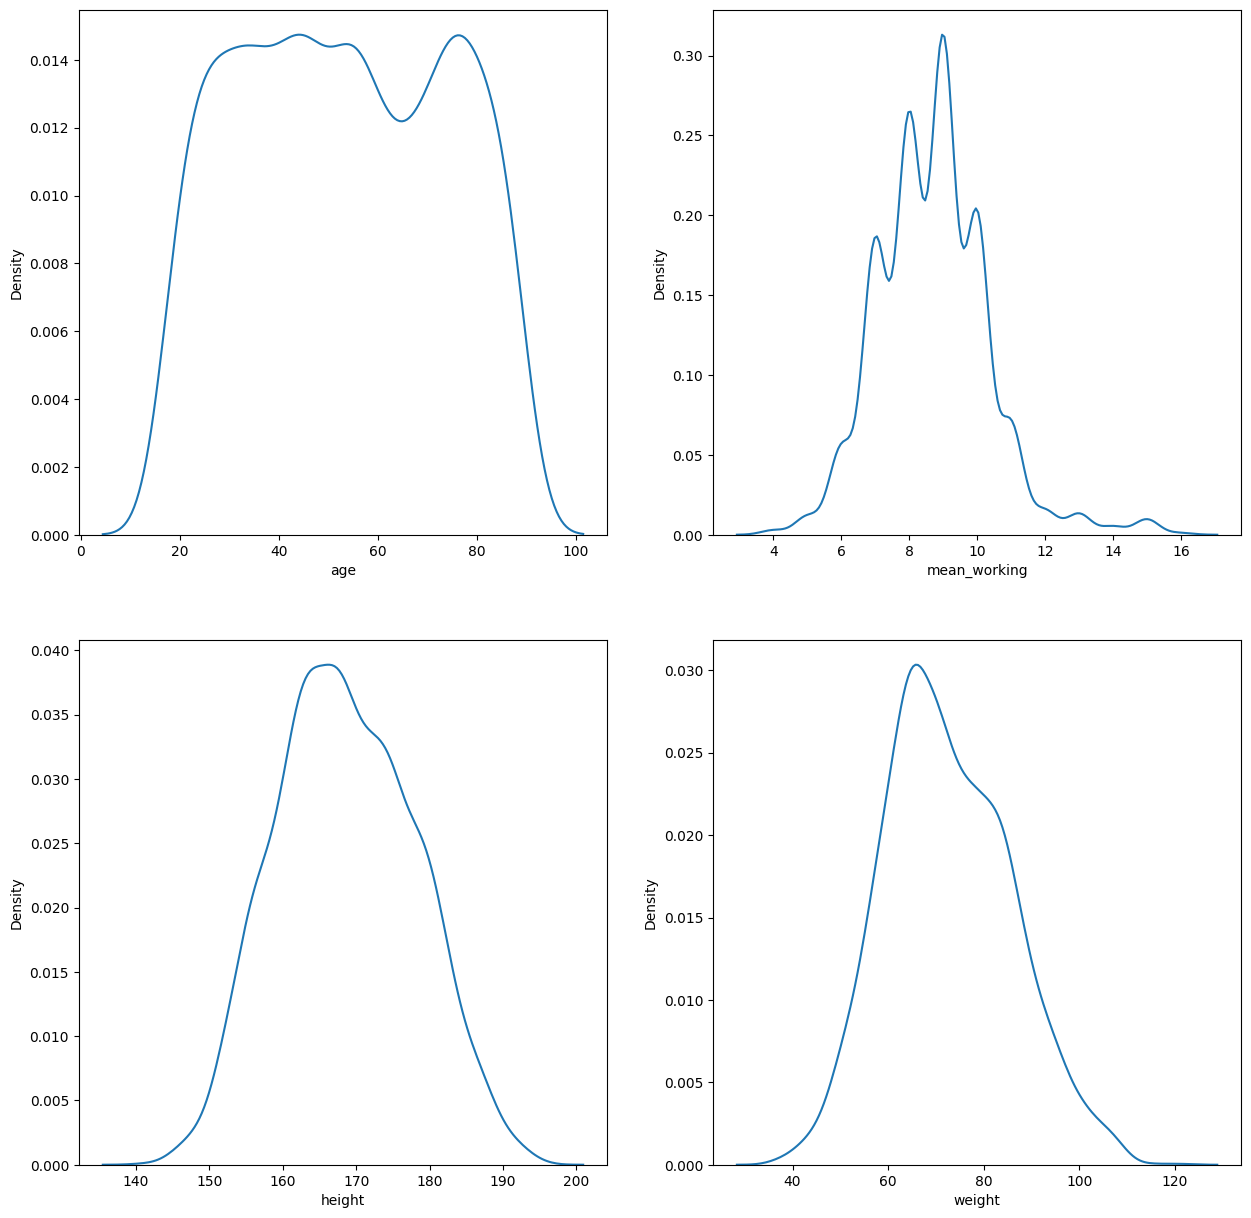

In [53]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

sns.kdeplot(train['age'], ax=axes[0,0])
sns.kdeplot(train['mean_working'], ax=axes[0,1])
sns.kdeplot(x='height', data=train, ax=axes[1,0])
sns.kdeplot(x='weight', data=train, ax=axes[1,1])
plt.show()

In [54]:
train[train['age']<20].sort_values('age') #20대 미만은 17살부터, 91개 레코드

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score
1738,TRAIN_1738,F,17,174.11,65.44,240.31,110,69,97.25,1.52,moderate,ex-smoker,heart disease,heart disease,oversleeping,bachelors degree,NaN,0.08
940,TRAIN_0940,M,17,173.17,56.04,189.23,149,77,129.32,1.69,moderate,ex-smoker,NaN,NaN,normal,graduate degree,NaN,0.28
1765,TRAIN_1765,M,17,173.27,56.04,189.48,149,77,129.13,1.70,moderate,ex-smoker,NaN,NaN,normal,graduate degree,NaN,0.28
1520,TRAIN_1520,F,17,164.10,57.80,189.95,106,83,97.82,1.54,moderate,non-smoker,NaN,NaN,normal,bachelors degree,NaN,0.66
2899,TRAIN_2899,M,17,175.32,78.54,207.88,141,83,111.80,1.62,moderate,ex-smoker,diabetes,high blood pressure,sleep difficulty,NaN,NaN,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,TRAIN_0794,M,19,185.11,83.28,210.53,106,72,143.20,1.44,light,non-smoker,high blood pressure,high blood pressure,normal,graduate degree,10.0,0.74
719,TRAIN_0719,M,19,177.20,87.62,202.43,117,77,128.97,1.38,light,non-smoker,diabetes,heart disease,sleep difficulty,bachelors degree,7.0,0.37
1330,TRAIN_1330,F,19,156.77,70.76,204.74,141,90,139.90,1.61,light,non-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,8.0,0.38
1791,TRAIN_1791,M,19,162.80,58.81,227.67,133,88,100.00,1.53,moderate,non-smoker,high blood pressure,NaN,sleep difficulty,high school diploma,7.0,0.65


<Axes: xlabel='stress_score', ylabel='Density'>

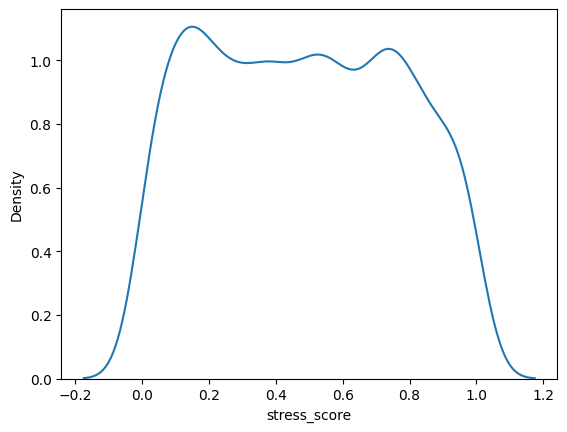

In [55]:
sns.kdeplot(x='stress_score', data=train)

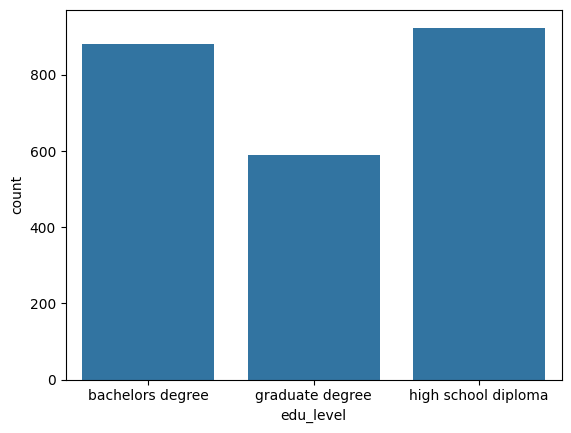

In [56]:
sns.countplot(x='edu_level', data=train)
plt.show()

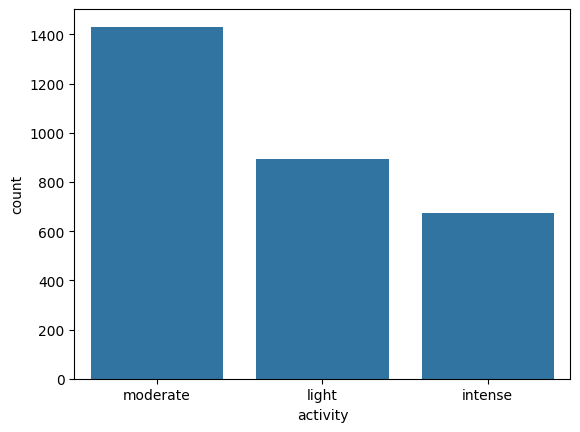

In [57]:
sns.countplot(x='activity', data=train)
plt.show()

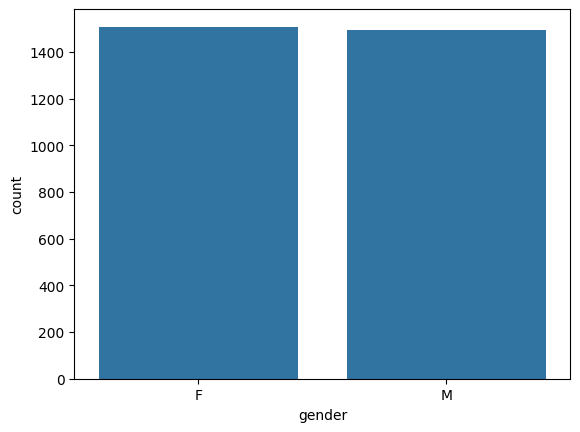

In [58]:
sns.countplot(x='gender', data=train)
plt.show()

<Axes: xlabel='sleep_pattern', ylabel='count'>

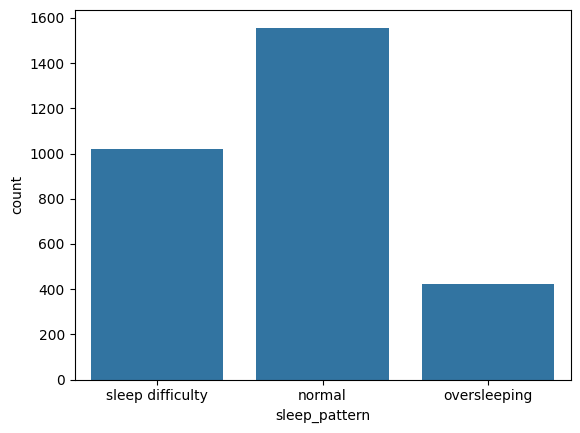

In [59]:
sns.countplot(x='sleep_pattern', data=train)

In [60]:
print('Female : ',len(train[train['gender']=='F']))
print('Male : ',len(train[train['gender']=='M']))

Female :  1508
Male :  1492


# EDA

In [61]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

None

<Axes: xlabel='gender', ylabel='stress_score'>

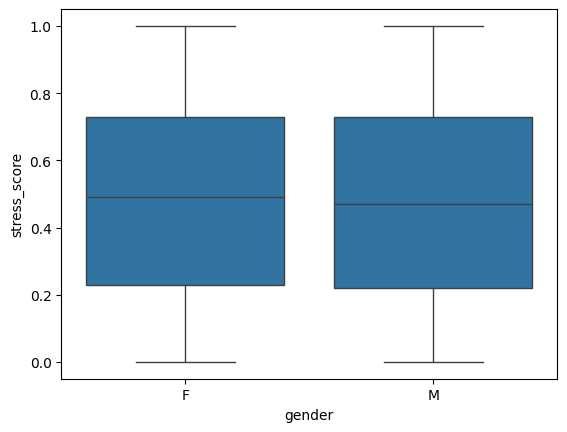

In [62]:
sns.boxplot(x='gender', y='stress_score', data=train)

<Axes: xlabel='smoke_status', ylabel='stress_score'>

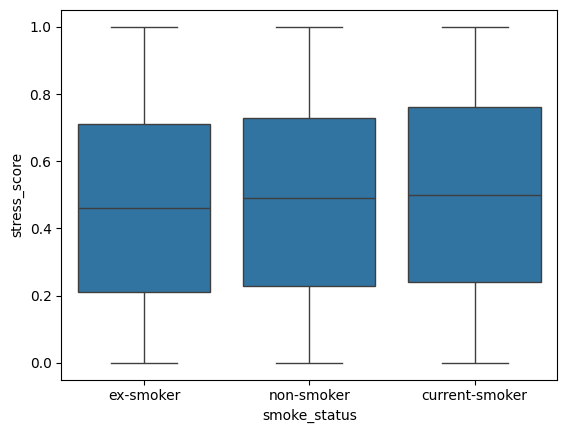

In [63]:
sns.boxplot(x='smoke_status', y='stress_score', data=train)

<Axes: xlabel='activity', ylabel='stress_score'>

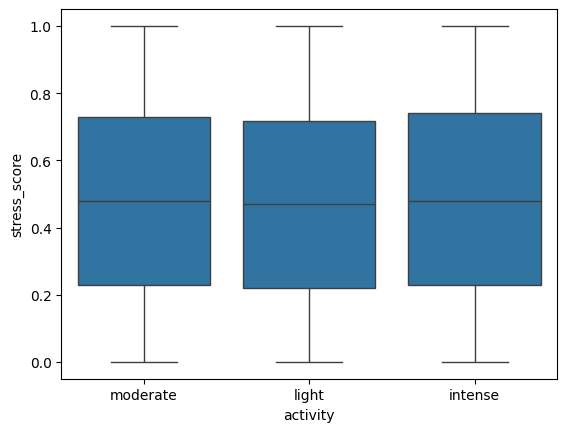

In [64]:
sns.boxplot(x='activity', y='stress_score', data=train)

In [65]:
train['age'].describe()

count    3000.00000
mean       53.06800
std        20.67207
min        17.00000
25%        35.00000
50%        53.00000
75%        72.00000
max        89.00000
Name: age, dtype: float64

In [66]:
#나이대 추가, 10대(17살)~80대(89살)
train['grade'] = train['age']

def age_to_grade(x):
    return  (x // 10) * 10 #80 살의 경우 몫은 8 * 10 하면 80대임

train['grade'] = train['age'].apply(age_to_grade)
train.head()

,ID,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,activity,smoke_status,medical_history,family_medical_history,sleep_pattern,edu_level,mean_working,stress_score,grade
0,TRAIN_0000,F,72,161.49,58.47,279.84,165,100,143.35,0.87,moderate,ex-smoker,high blood pressure,diabetes,sleep difficulty,bachelors degree,NaN,0.63,70
1,TRAIN_0001,M,88,179.87,77.60,257.37,178,111,146.94,0.07,moderate,ex-smoker,NaN,diabetes,normal,graduate degree,NaN,0.83,80
2,TRAIN_0002,M,47,182.47,89.93,226.66,134,95,142.61,1.18,light,ex-smoker,NaN,NaN,normal,high school diploma,9.0,0.70,40
3,TRAIN_0003,M,69,185.78,68.63,206.74,158,92,137.26,0.48,intense,ex-smoker,high blood pressure,NaN,oversleeping,graduate degree,NaN,0.17,60
4,TRAIN_0004,F,81,164.63,71.53,255.92,171,116,129.37,0.34,moderate,ex-smoker,diabetes,diabetes,sleep difficulty,bachelors degree,NaN,0.36,80


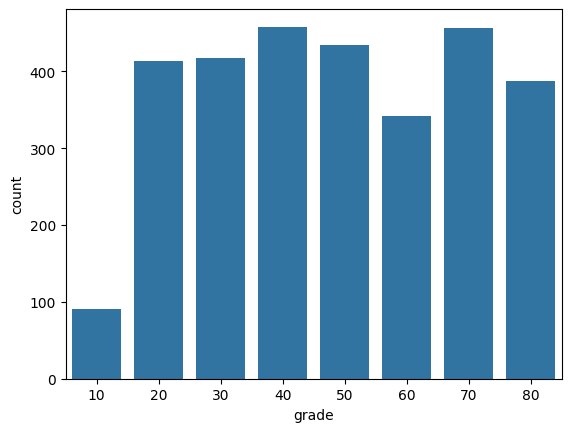

In [67]:
sns.countplot(x='grade', data=train)
plt.show()

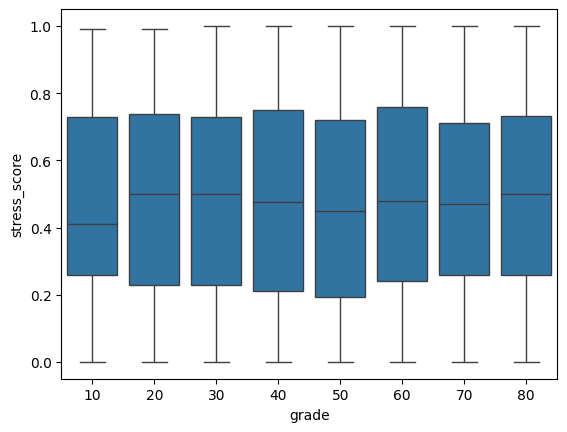

In [68]:
sns.boxplot(x='grade', y='stress_score', data=train)
plt.show()

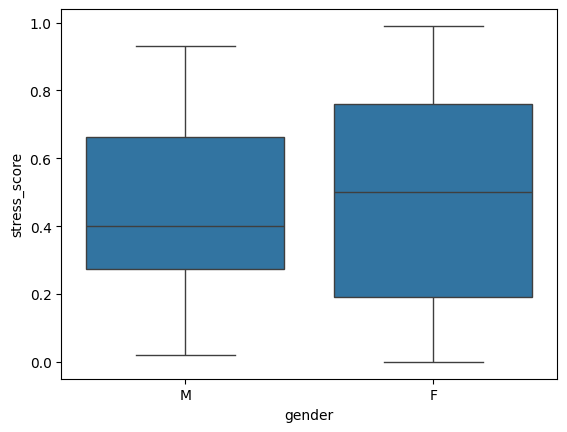

In [69]:
sns.boxplot(x='gender', y='stress_score', data=train[(train['age']<20)])
plt.show()

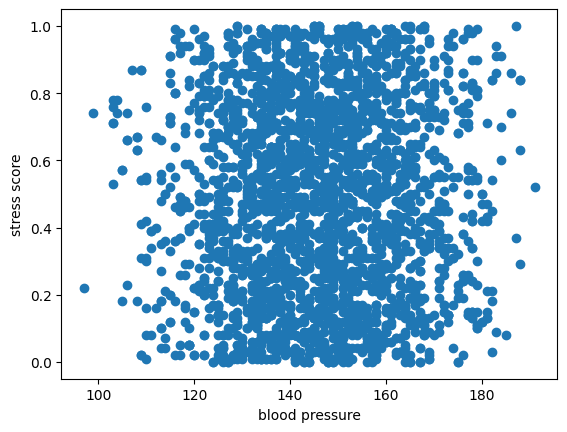

In [70]:
plt.scatter(train['systolic_blood_pressure'], train['stress_score'])
plt.xlabel('blood pressure')
plt.ylabel('stress score')
plt.show()

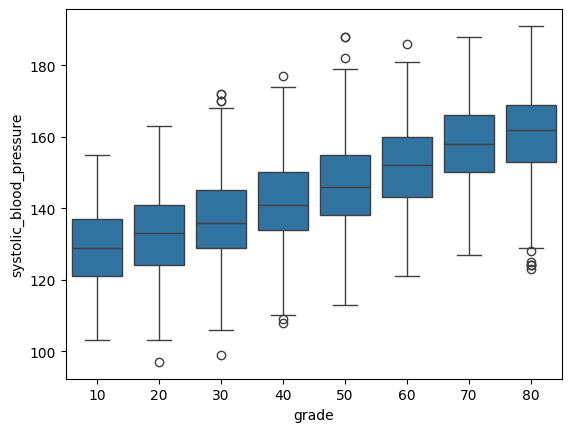

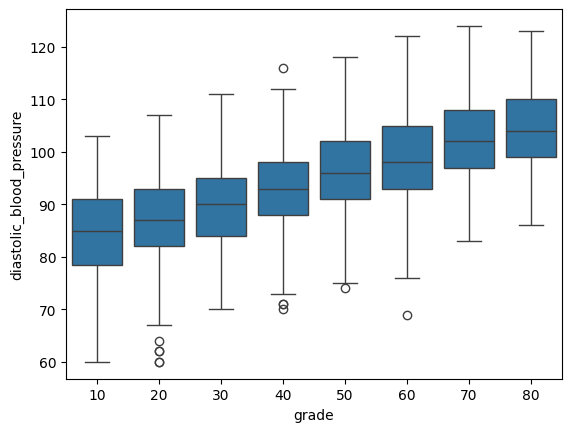

In [71]:
sns.boxplot(x=train['grade'], y=train['systolic_blood_pressure'])
plt.show()
sns.boxplot(x=train['grade'], y=train['diastolic_blood_pressure'])
plt.show()

In [72]:
train['pulse_pressure'] = train['systolic_blood_pressure'] - train['diastolic_blood_pressure']

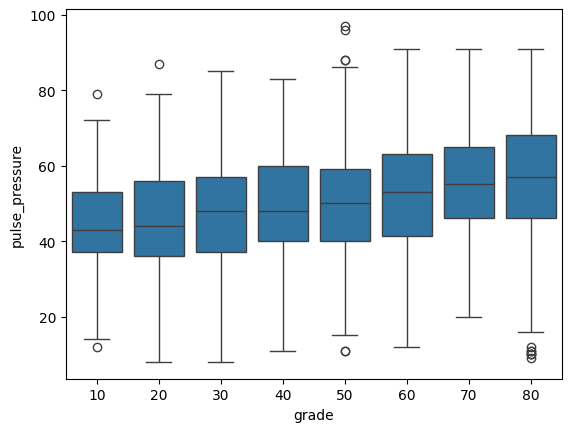

In [73]:
sns.boxplot(x=train['grade'], y=train['pulse_pressure'])
plt.show()

In [74]:
train['pulse_pressure_normal'] = train['pulse_pressure']


In [75]:
def pulse_nor_abnor(x):
    if x < 30:
        return -1
    if x > 60:
        return 1
    else:
        return 0

In [76]:
train['pulse_pressure_normal'] = train['pulse_pressure'].apply(pulse_nor_abnor)

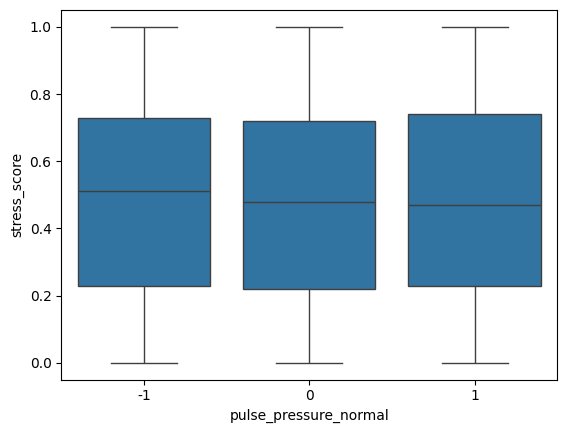

In [77]:
sns.boxplot(x='pulse_pressure_normal', y='stress_score', data=train)
plt.show()

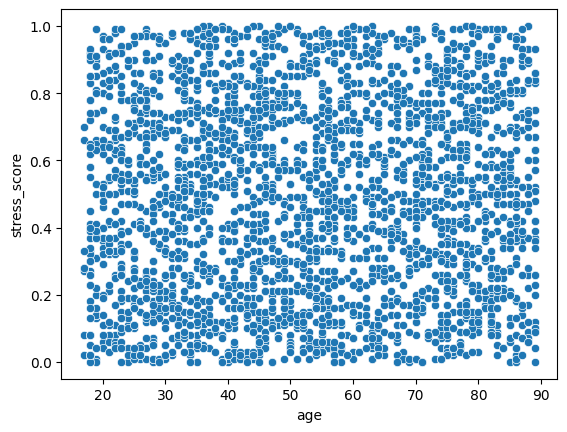

In [78]:
sns.scatterplot(x= train['age'], y= train['stress_score'])
plt.show()

#### medical_history, family_medical_history

In [79]:
display(train['medical_history'].value_counts())
display(train['family_medical_history'].value_counts())

medical_history
high blood pressure    697
heart disease          508
diabetes               506
Name: count, dtype: int64

family_medical_history
diabetes               615
high blood pressure    480
heart disease          419
Name: count, dtype: int64

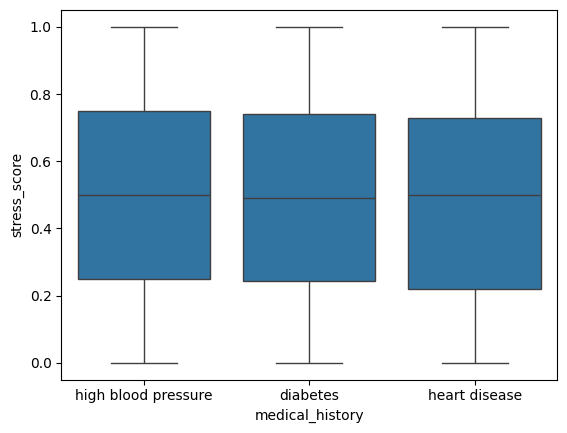

In [80]:
sns.boxplot(x='medical_history', y='stress_score', data=train)
plt.show()

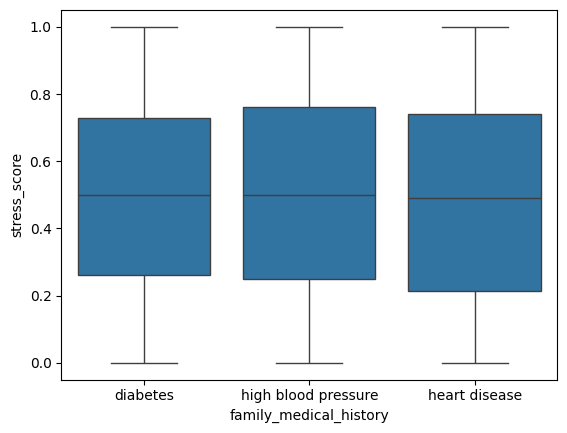

In [81]:
sns.boxplot(x='family_medical_history', y='stress_score', data=train)
plt.show()

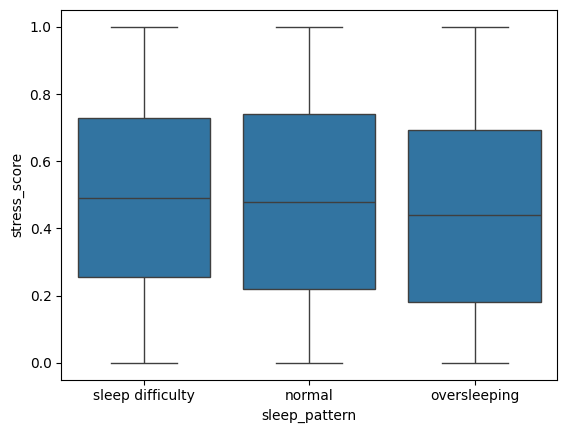

In [98]:
#sleep pattern
sns.boxplot(x='sleep_pattern', y='stress_score', data = train)
plt.show()

#### mean_working & edu_level
- 공백 발생하는 이유 찾기 (나이대?)

1032

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score,grade,pulse_pressure,pulse_pressure_normal
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,0.0,1032.000000,1032.000000,1032.000000,1032.000000
mean,74.395349,169.065727,72.368692,244.930048,156.919574,101.820736,135.295068,0.500504,NaN,0.491211,69.321705,55.098837,0.322674
std,14.772661,9.390366,13.395515,23.142073,14.066157,8.827907,17.526009,0.335073,NaN,0.280061,15.450719,14.896341,0.551472
min,17.000000,144.060000,37.510000,171.030000,106.000000,60.000000,81.760000,-0.220000,NaN,0.000000,10.000000,9.000000,-1.000000
25%,71.000000,162.265000,62.482500,230.067500,149.000000,96.000000,123.795000,0.300000,NaN,0.260000,70.000000,45.000000,0.000000
50%,77.000000,168.665000,71.245000,243.795000,158.000000,102.000000,135.385000,0.450000,NaN,0.480000,70.000000,55.000000,0.000000
75%,83.000000,175.437500,82.282500,260.477500,166.000000,108.000000,146.912500,0.600000,NaN,0.730000,80.000000,65.000000,1.000000
max,89.000000,195.280000,109.250000,313.350000,191.000000,124.000000,185.740000,2.000000,NaN,1.000000,80.000000,91.000000,1.000000


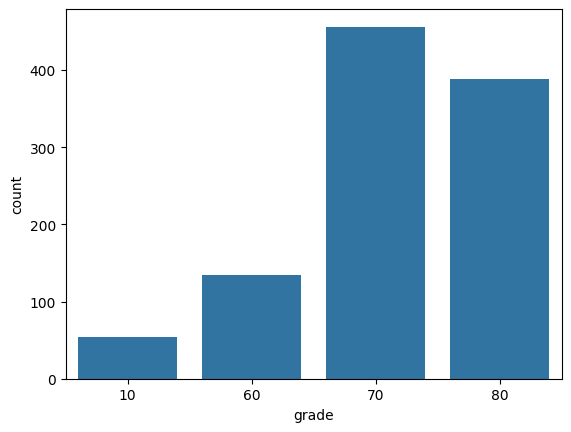

In [82]:
display(len(train[train['mean_working'].isnull()]))
display(train[train['mean_working'].isnull()].describe())
sns.countplot(x='grade', data=train[train['mean_working'].isnull()])
plt.show() #근로자가 아닌 10대, 60, 70, 80 대임 ==> na 0으로 초기화 가능하다고 생각.

In [83]:
display(len(train[train['edu_level'].isnull()]))
display(train[train['edu_level'].isnull()].describe())

607

,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score,grade,pulse_pressure,pulse_pressure_normal
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,369.000000,607.000000,607.000000,607.000000,607.000000
mean,54.367381,168.139390,71.988567,233.150626,146.871499,96.189456,126.267545,0.910395,8.785908,0.511236,49.736409,50.682043,0.184514
std,20.655315,9.484322,13.261131,25.779644,15.646570,9.824803,18.669248,0.451144,1.610164,0.287780,20.567759,14.842831,0.540954
min,17.000000,144.060000,36.320000,162.790000,97.000000,70.000000,73.930000,-0.110000,5.000000,0.000000,10.000000,13.000000,-1.000000
25%,36.500000,160.930000,62.500000,215.720000,136.000000,89.000000,112.930000,0.540000,8.000000,0.250000,30.000000,41.000000,0.000000
50%,56.000000,167.230000,70.440000,233.380000,148.000000,96.000000,126.900000,0.890000,9.000000,0.520000,50.000000,50.000000,0.000000
75%,72.000000,175.340000,81.030000,251.640000,158.000000,104.000000,139.170000,1.275000,10.000000,0.760000,70.000000,61.000000,1.000000
max,89.000000,193.210000,120.880000,301.570000,188.000000,119.000000,185.740000,1.920000,16.000000,1.000000,80.000000,91.000000,1.000000


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

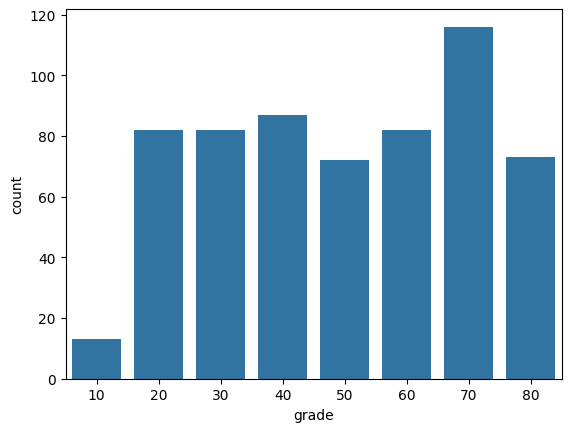

In [85]:
sns.countplot(x='grade', data=train[train['edu_level'].isnull()])
plt.show()

# Preprocessing
- 결측치
    - mean_working : 근로자가 아닌 10대, 60, 70, 80 대임 ==> na 0으로 초기화 가능하다고 생각.
    - edu_level : 모르겠음.

In [86]:
train['medical_history'] = train['medical_history'].fillna('None')
train['family_medical_history'] = train['family_medical_history'].fillna('None')

In [125]:
def sleep_pattern(x):
    if x == 'sleep difficulty':
        return -1
    if x == 'oversleeping':
        return 1
    else:
        return 0
    
train['sleep_pattern_label'] = train['sleep_pattern'].apply(sleep_pattern)
train[['sleep_pattern','sleep_pattern_label']]

,sleep_pattern,sleep_pattern_label
0,sleep difficulty,-1
1,normal,0
2,normal,0
3,oversleeping,1
4,sleep difficulty,-1
...,...,...
2995,oversleeping,1
2996,normal,0
2997,normal,0
2998,oversleeping,1


In [124]:
def smoke_status(x):
    if x =='ex-smoker':
        return 1
    if x =='current-smoker':
        return 2
    else:
        return 0
    
train['smoke_status_label'] = train['smoke_status'].apply(smoke_status)

In [87]:
def class_div(x):
    if x == 'None':
        return 0
    else:
        return 1

#is_medical_history
train['is_medical_history']=train['medical_history'].apply(class_div)
#is_family_history
train['is_family_history'] = train['family_medical_history'].apply(class_div)

train[['medical_history','family_medical_history','is_medical_history','is_family_history']]

,medical_history,family_medical_history,is_medical_history,is_family_history
0,high blood pressure,diabetes,1,1
1,None,diabetes,0,1
2,None,None,0,0
3,high blood pressure,None,1,0
4,diabetes,diabetes,1,1
...,...,...,...,...
2995,None,None,0,0
2996,None,None,0,0
2997,None,None,0,0
2998,None,None,0,0


In [88]:
train['mean_working'] = train['mean_working'].fillna(0.0)

In [89]:
train['edu_level'] = train['edu_level'].fillna('None')

In [104]:
train['edu_level'].value_counts()

edu_level
high school diploma    924
bachelors degree       880
None                   607
graduate degree        589
Name: count, dtype: int64

In [108]:
def edu_level(x):
    if x == 'high school diploma':
        return 1
    if x == 'bachelors degree':
        return 2 
    if x == 'graduate degree':
        return 3
    else:
        return 0

In [109]:
train['edu_level_label'] = train['edu_level'].apply(edu_level)
train[['edu_level','edu_level_label']]

,edu_level,edu_level_label
0,bachelors degree,2
1,graduate degree,3
2,high school diploma,1
3,graduate degree,3
4,bachelors degree,2
...,...,...
2995,None,0
2996,high school diploma,1
2997,None,0
2998,high school diploma,1


In [90]:
train.isna().sum()

ID                          0
gender                      0
age                         0
height                      0
weight                      0
cholesterol                 0
systolic_blood_pressure     0
diastolic_blood_pressure    0
glucose                     0
bone_density                0
activity                    0
smoke_status                0
medical_history             0
family_medical_history      0
sleep_pattern               0
edu_level                   0
mean_working                0
stress_score                0
grade                       0
pulse_pressure              0
pulse_pressure_normal       0
is_medical_history          0
is_family_history           0
dtype: int64

In [91]:
train['gender'] = train['gender'].apply(lambda x: 1 if x == 'M' else 0)

### 스케일 변환

In [112]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   int64  
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           3000 non-null   object 
 13  family_medical_history    3000 non-null   object 
 14  sleep_pa

In [97]:
train['sleep_pattern']

0       sleep difficulty
1                 normal
2                 normal
3           oversleeping
4       sleep difficulty
              ...       
2995        oversleeping
2996              normal
2997              normal
2998        oversleeping
2999              normal
Name: sleep_pattern, Length: 3000, dtype: object

In [118]:
#ID, activity, smkoe_status, medical_history, famliy_medical_history, edu_level, sleep_pattern
train_numeric=train.drop(['ID', 'activity', 'smoke_status', 'medical_history', 'family_medical_history', 'edu_level', 'sleep_pattern'], axis=1)
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    3000 non-null   int64  
 1   age                       3000 non-null   int64  
 2   height                    3000 non-null   float64
 3   weight                    3000 non-null   float64
 4   cholesterol               3000 non-null   float64
 5   systolic_blood_pressure   3000 non-null   int64  
 6   diastolic_blood_pressure  3000 non-null   int64  
 7   glucose                   3000 non-null   float64
 8   bone_density              3000 non-null   float64
 9   mean_working              3000 non-null   float64
 10  stress_score              3000 non-null   float64
 11  grade                     3000 non-null   int64  
 12  pulse_pressure            3000 non-null   int64  
 13  pulse_pressure_normal     3000 non-null   int64  
 14  is_medic

#### 상관분석

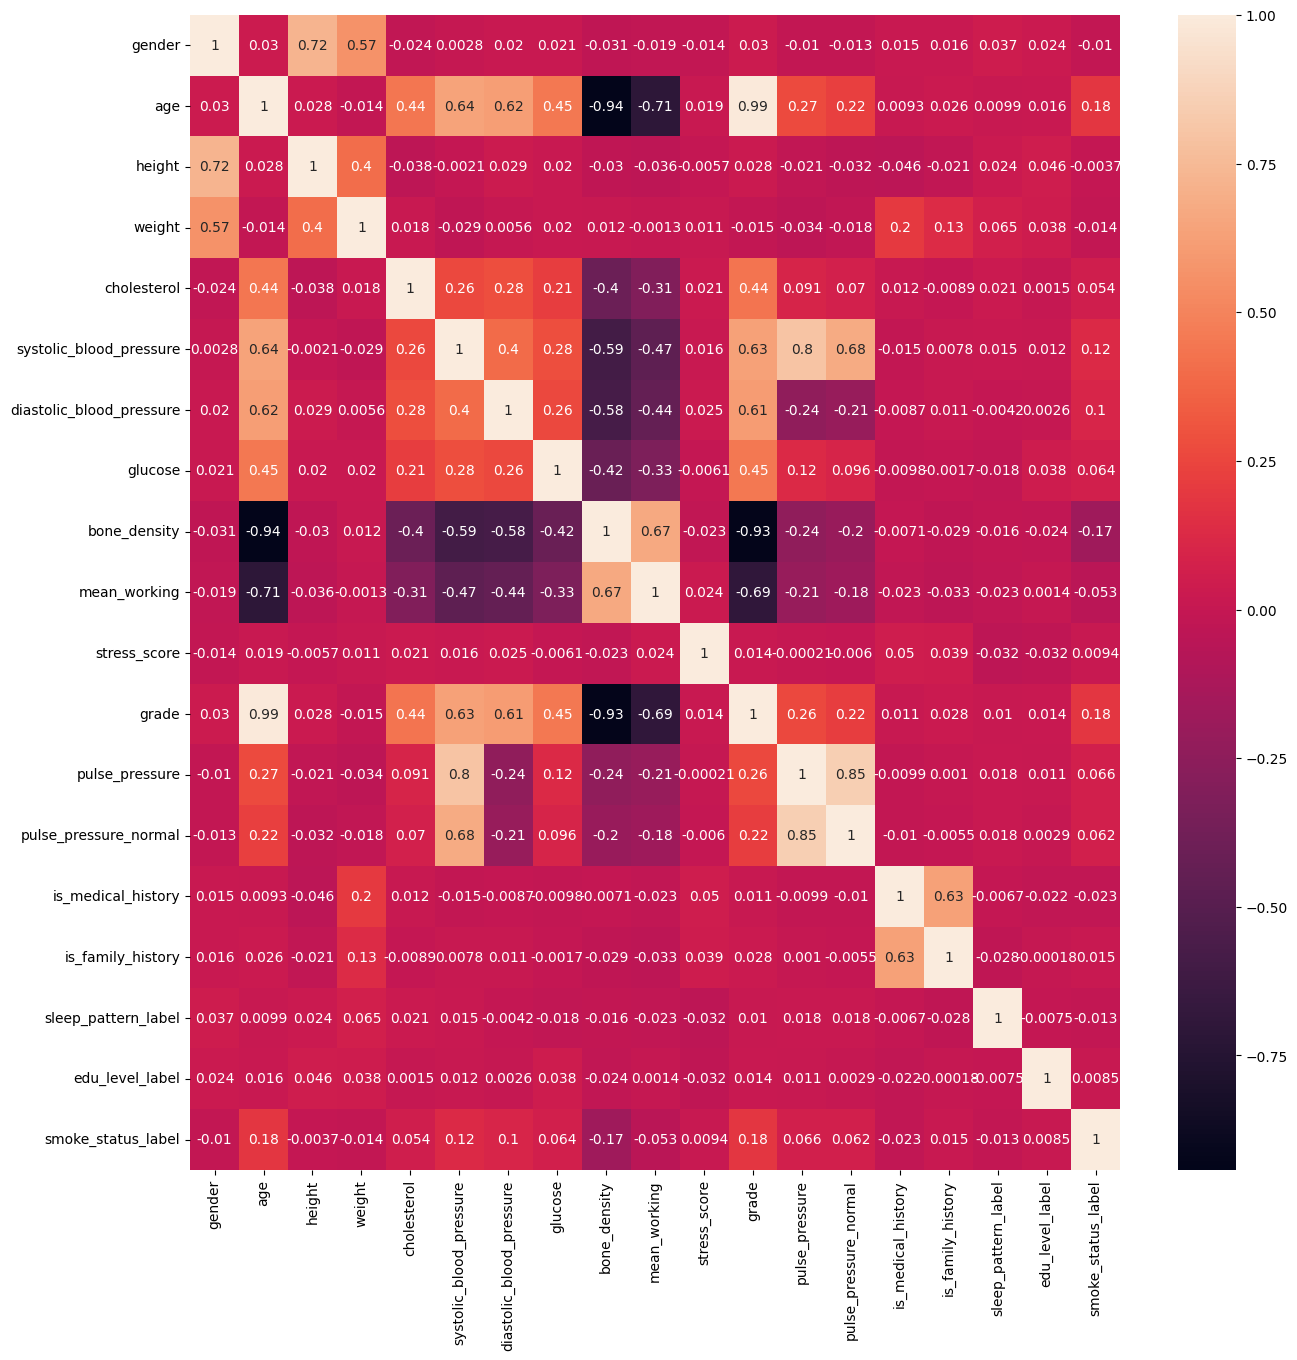

In [122]:
# 상관분석
corr = train_numeric.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

In [123]:
corr

,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score,grade,pulse_pressure,pulse_pressure_normal,is_medical_history,is_family_history,sleep_pattern_label,edu_level_label,smoke_status_label
gender,1.000000,0.029628,0.722969,0.567435,-0.023704,0.002847,0.020150,0.020903,-0.031112,-0.019291,-0.013620,0.030465,-0.010311,-0.012815,0.014899,0.016051,0.037030,0.023695,-0.010479
age,0.029628,1.000000,0.027945,-0.013509,0.440105,0.641278,0.619822,0.451781,-0.942433,-0.708123,0.018656,0.990619,0.269204,0.220304,0.009306,0.025645,0.009936,0.016207,0.182890
height,0.722969,0.027945,1.000000,0.403008,-0.038374,-0.002129,0.028868,0.020071,-0.030143,-0.036223,-0.005664,0.028214,-0.021347,-0.032124,-0.045682,-0.021266,0.024426,0.046016,-0.003675
weight,0.567435,-0.013509,0.403008,1.000000,0.017518,-0.028704,0.005581,0.020436,0.011775,-0.001307,0.011328,-0.014738,-0.034089,-0.018208,0.196372,0.130053,0.065431,0.037542,-0.013988
cholesterol,-0.023704,0.440105,-0.038374,0.017518,1.000000,0.263255,0.283728,0.213588,-0.404007,-0.307992,0.021288,0.435995,0.091148,0.070396,0.012338,-0.008874,0.021278,0.001522,0.053707
systolic_blood_pressure,0.002847,0.641278,-0.002129,-0.028704,0.263255,1.000000,0.398985,0.280364,-0.593690,-0.469846,0.015635,0.631724,0.795142,0.675646,-0.014747,0.007847,0.014813,0.012472,0.124599
diastolic_blood_pressure,0.020150,0.619822,0.028868,0.005581,0.283728,0.398985,1.000000,0.260258,-0.581786,-0.436559,0.025351,0.612757,-0.238814,-0.208603,-0.008667,0.011048,-0.004214,0.002624,0.100200
glucose,0.020903,0.451781,0.020071,0.020436,0.213588,0.280364,0.260258,1.000000,-0.416830,-0.327056,-0.006083,0.448233,0.124788,0.096276,-0.009791,-0.001736,-0.017946,0.037582,0.064360
bone_density,-0.031112,-0.942433,-0.030143,0.011775,-0.404007,-0.593690,-0.581786,-0.416830,1.000000,0.668358,-0.022556,-0.932167,-0.243962,-0.199766,-0.007117,-0.029035,-0.016035,-0.023994,-0.174515
mean_working,-0.019291,-0.708123,-0.036223,-0.001307,-0.307992,-0.469846,-0.436559,-0.327056,0.668358,1.000000,0.023997,-0.692679,-0.208855,-0.182649,-0.022787,-0.033375,-0.023266,0.001402,-0.053434


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   int64  
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           3000 non-null   object 
 13  family_medical_history    3000 non-null   object 
 14  sleep_pa

In [127]:
train_numeric.to_csv('train_numeric.csv', index=False)